# **Load Libraries & Dataset**

In [14]:
#removing or hiding warnings

import warnings
warnings.filterwarnings('ignore')

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment in India.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# **Data Cleaning & Preprocessing**

In [16]:
df.info()
df.isnull().sum()

# Rename columns for convenience
df.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate',
              'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check data types and unique values
print(df['State'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odish

# **Data Exploration**

**📊 Basic Statistics**

In [17]:
print(df.describe())
print(df['State'].value_counts())

                                Date  Estimated Unemployment Rate  \
count                            740                   740.000000   
mean   2019-12-12 18:36:58.378378496                    11.787946   
min              2019-05-31 00:00:00                     0.000000   
25%              2019-08-31 00:00:00                     4.657500   
50%              2019-11-30 00:00:00                     8.350000   
75%              2020-03-31 00:00:00                    15.887500   
max              2020-06-30 00:00:00                    76.740000   
std                              NaN                    10.721298   

       Estimated Employed  Estimated Labour Participation Rate  
count        7.400000e+02                           740.000000  
mean         7.204460e+06                            42.630122  
min          4.942000e+04                            13.330000  
25%          1.190404e+06                            38.062500  
50%          4.744178e+06                            

**📉 Average Unemployment Rate by State**

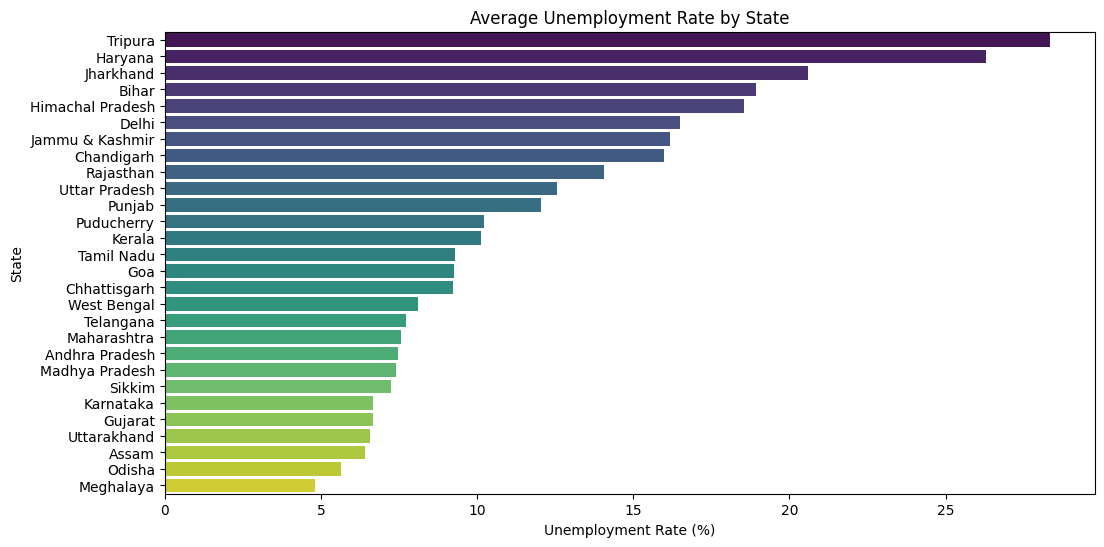

In [18]:
state_unemp = df.groupby('State')['Estimated Unemployment Rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_unemp.values, y=state_unemp.index, palette='viridis')
plt.title("Average Unemployment Rate by State")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("State")
plt.show()

# **Visualizing Trends**

**📅 Unemployment Over Time**

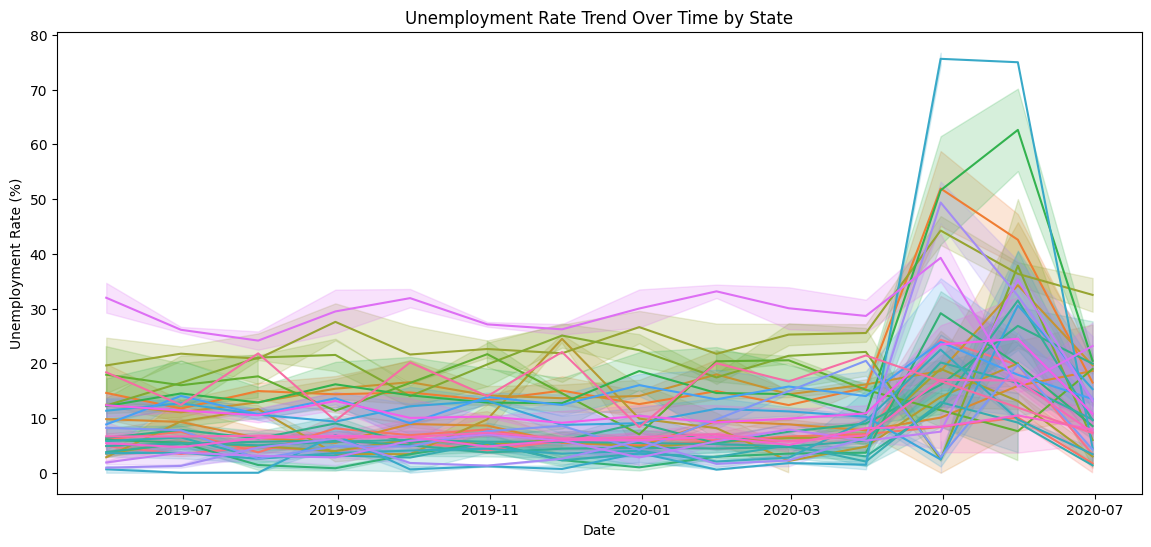

In [19]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate', hue='State', legend=False)
plt.title("Unemployment Rate Trend Over Time by State")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


**🗺️ Heatmap by Region**

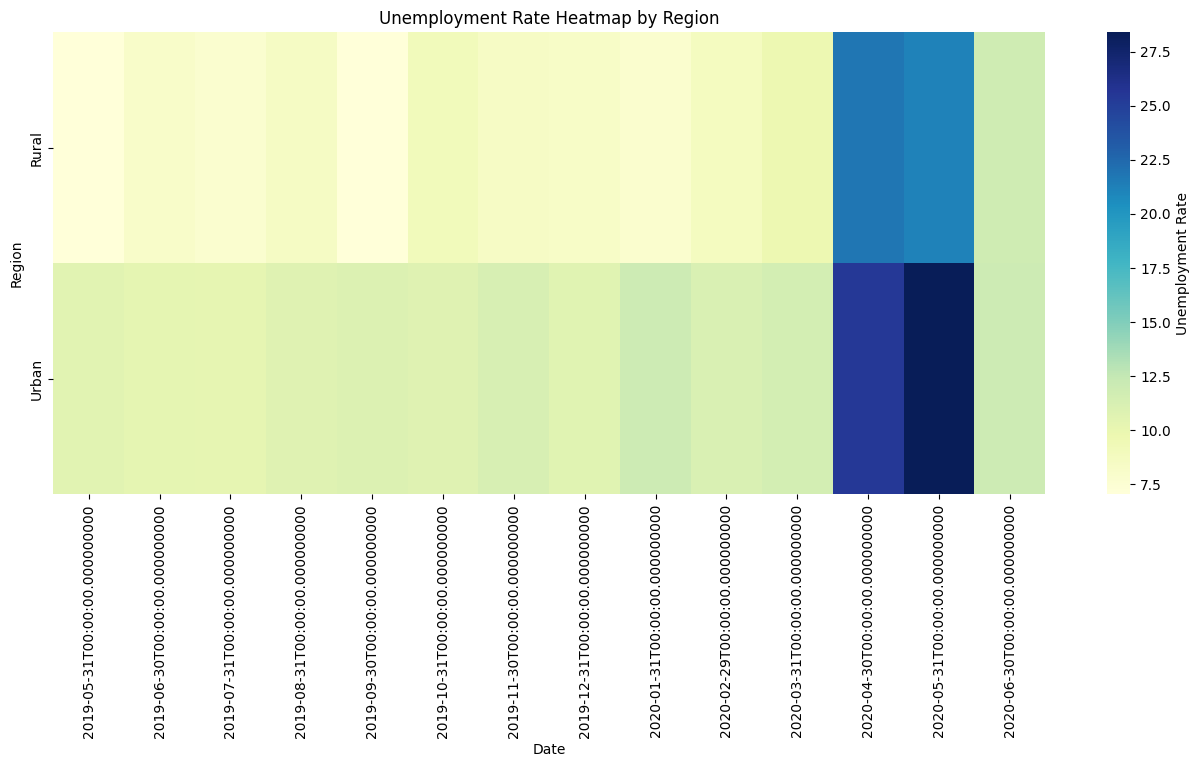

In [20]:
pivot = df.pivot_table(values='Estimated Unemployment Rate', index='Region', columns='Date')
plt.figure(figsize=(16, 6))
sns.heatmap(pivot, cmap="YlGnBu", cbar_kws={'label': 'Unemployment Rate'})
plt.title("Unemployment Rate Heatmap by Region")
plt.show()

# **Covid-19 Impact Analysis**

**📆 Focus on Pandemic Years (2020–2021)**

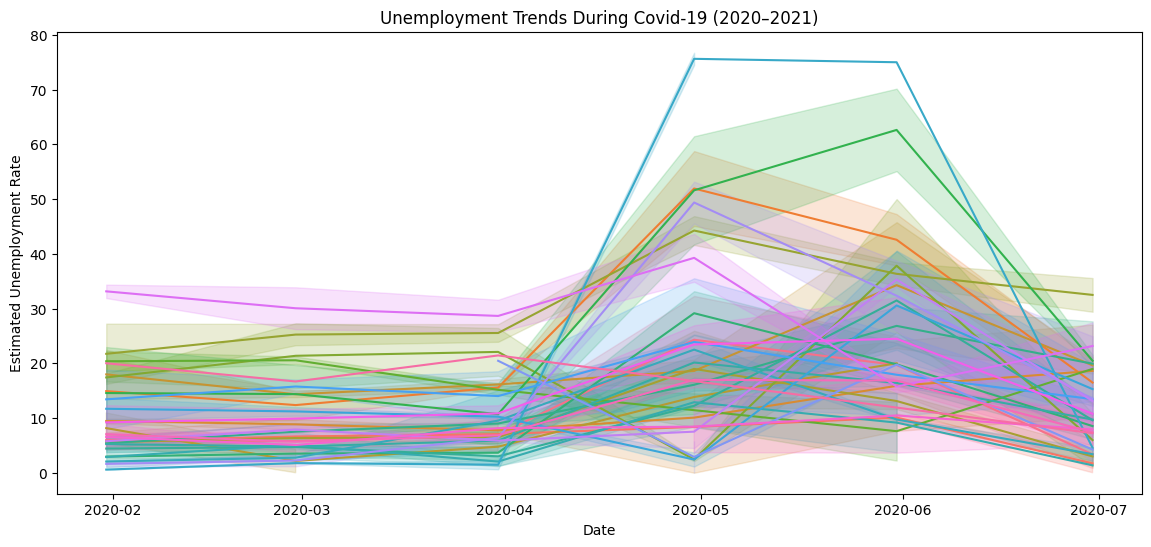

In [21]:
covid_df = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2021-12-31')]

plt.figure(figsize=(14, 6))
sns.lineplot(data=covid_df, x='Date', y='Estimated Unemployment Rate', hue='State', legend=False)
plt.title("Unemployment Trends During Covid-19 (2020–2021)")
plt.show()


In [22]:
pre_covid = df[df['Date'] < '2020-03-01']['Estimated Unemployment Rate'].mean()
during_covid = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2021-12-31')]['Estimated Unemployment Rate'].mean()
print(f"Pre-Covid Avg Unemployment: {pre_covid:.2f}%")
print(f"During Covid Avg Unemployment: {during_covid:.2f}%")


Pre-Covid Avg Unemployment: 9.51%
During Covid Avg Unemployment: 17.77%


# **Seasonal Pattern Detection (Optional)**

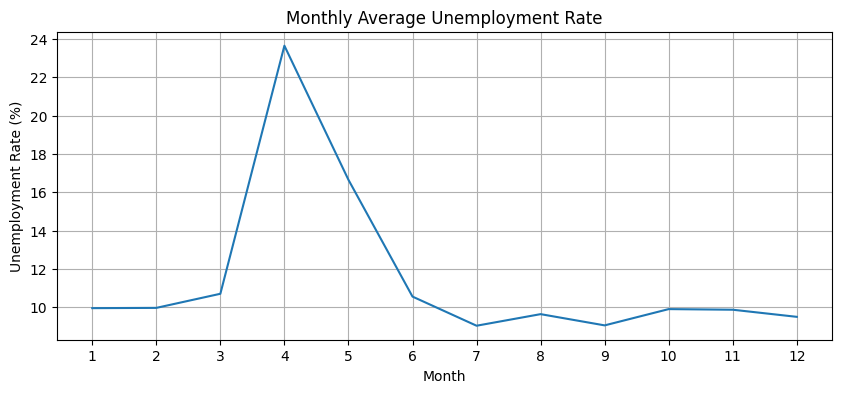

In [23]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate'].mean()

plt.figure(figsize=(10, 4))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
plt.xticks(range(1,13))
plt.title("Monthly Average Unemployment Rate")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
plt.show()


# **🧠 Task 2: Unemployment Analysis with Python**


# **📌 Objective**

Analyze unemployment rate data from India to:

Understand unemployment trends over time.

Visualize regional and seasonal patterns.

Assess the impact of Covid-19 on unemployment.

Provide data-driven insights for economic or social policymaking.

# **🗂️ Dataset Details**

Source: Kaggle – Unemployment in India

Columns:

Region – Region name

State – Indian state name

Date – Recorded month/year

Frequency – Monthly (assumed)

Estimated Unemployment Rate (%)

Estimated Employed

Estimated Labour Participation Rate

# **🧰 Technologies Used**

Language: Python

Libraries:

pandas – data manipulation

matplotlib & seaborn – visualization

datetime – for handling time features (month/year)

Tool: Jupyter Notebook

         
   # **🔁 Step-by-Step Workflow**
        
# **✅ Step 1: Load and Inspect Data**

Import dataset using pandas.read_csv().

Inspect structure: df.head(), df.info(), df.describe().

Clean column names and convert Date to datetime.

# **✅ Step 2: Data Cleaning**

Check for missing values.

Rename columns for consistency.

Convert Date column to datetime format.

Extract Month and Year for time-based analysis.

# **✅ Step 3: Exploratory Data Analysis (EDA)**

**📌 a. Unemployment Rate by State**

Compute average unemployment rate per state.

Use barplot to visualize state-wise comparison.

**📌 b. Time Series Trend**

Plot unemployment trends across time.

Use lineplot with Date on x-axis and Unemployment Rate on y-axis.

**📌 c. Regional Heatmap**

Create pivot table (Region × Date).

Use seaborn.heatmap() to visualize temporal regional trends.

# **✅ Step 4: Covid-19 Impact Analysis**

**🧪 Define Time Window:**

Pre-Covid: Before March 2020

Covid Period: March 2020 to Dec 2021

**📊 Compare Averages:**

Calculate average unemployment before and during Covid.

Visualize unemployment spikes during lockdown (March–May 2020).

# **✅ Step 5: Seasonal Trend Detection**

Extract month from Date.

Group by month and calculate average unemployment.

Use lineplot to identify seasonal effects (e.g., monsoon or year-end job losses).

# **✅ Step 6: Key Insights**

**🔍 Findings:**

Covid-19 caused a sharp spike in unemployment rates, especially in mid-2020.

Certain states like Haryana, Tripura, and Rajasthan had consistently high unemployment.

Seasonal variation suggests unemployment increases during mid-year or monsoon months.

Labour Participation Rate also fluctuates regionally.


# **✅ Summary**

| Component                   | Description                              |
| --------------------------- | ---------------------------------------- |
| **Dataset Source**          | Kaggle – Unemployment in India           |
| **Total States**            | Multiple (28+), regional mapping         |
| **Covid-19 Trend Analysis** | Significant spike in early 2020          |
| **Seasonal Trend**          | Mid-year & monsoon rise in unemployment  |
| **Tools Used**              | Python, Pandas, Seaborn, Matplotlib      |
| **Output**                  | Time series graphs, bar charts, heatmaps |
| **Insights**                | Policy suggestions, regional targeting   |
